In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

## 1.Sigmoid
也叫Logistic函数：
${\rm Sigmoid}(x)\triangleq\frac1{1+{\rm e}^{-x}}$

将$x$压缩到$x\in(0,1)$区间，其意义：
* (0,1)和概率分布范围\[0,1\]较契合，可使用该函数将输出转译为概率输出
* 理解为信号强度，如像素颜色强度，1代表当前通道颜色最强，0代表当前通道无颜色

Sigmoid函数连续可导，可直接利用梯度下降算法优化网络参数。

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch06-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/img/06.png?raw=true)

TensorFlow中`tf.nn.sigmoid`实现了该函数：

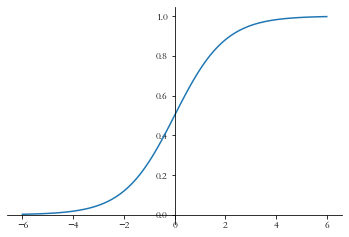

x_max=0.9975274205207825, x_min=0.0024726230185478926


In [2]:
x=tf.linspace(-6.,6.,100)
y=tf.nn.sigmoid(x)
plt.plot(x,y)
#gca 获取坐标轴的意思 axis
ax = plt.gca()
def mod_ax(ax):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    #把x轴刻度设置为bottom
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
mod_ax(ax)
plt.show()

print(f'x_max={tf.reduce_max(y)}, x_min={tf.reduce_min(y)}')

## 2.ReLU
Sigmoid在输入值较大或较小时容易出现梯度值接近0的现象，称为梯度弥散现象。该现象导致网络参数更新慢。
对此，2012年提出的8层AlexNet模型采用了一种名叫ReLU(Rectified Linear Unit，修正线性单元)的激活函数：

${\rm ReLU}\triangleq{\rm max}(0,x)$

如下图，可以看到，ReLU对小于0的值全部抑制为0；对于正数则直接输出，这种单边抑制特性来源于生物学。

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch06-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/img/07.png?raw=true)

2001年,神经科学家Dayan和Abott模拟得出更加精确的脑神经元激活模型，如下图所示,它具有单侧抑制、相对宽松的兴奋边界等特性,ReLU函数的设计与之非常类似

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch06-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/img/08.png?raw=true)

TensorFlow中使用`tf.nn.relu`实现：

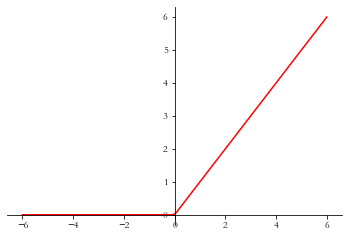

In [3]:
y1=tf.nn.relu(x)
plt.plot(x,y1,color='r')
mod_ax(plt.gca())
plt.show()

除了可以使用函数式接口`tf.nn.relu`实现ReLU函数外，还可以像`Dense`层一样将ReLU函数作为一个网络层添加到网络中，对应的类为`layers.ReLU()`类。一般来说，激活函数类并不是主要的网络运算层，不计入网络的层数。

## 3.LeakyReLU
ReLU函数在$x<0$时导数值恒为0，也可能会造成梯度弥散现象，为了克服该问题，LeakyReLU被提出：

${\rm LeakyReLU}\triangleq{\begin{cases} x&x\ge0\\ px&x\lt0 \end{cases}}$

其中$p$为用户设置的较小数值的超参数，如0.02，从而当$x\lt0$时也能获得较小导数值$p$，避免梯度弥散现象。

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch06-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/img/09.png?raw=true)

TensorFlow实现：

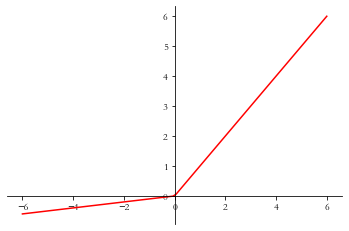

In [4]:
y2=tf.nn.leaky_relu(x,alpha=0.1)
plt.plot(x,y2,color='r')
mod_ax(plt.gca())
plt.show()

## 4.Tanh
Tanh函数能将$x\in R$的输入压缩到(-1,1)：

${\rm tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}}\\=2\cdot{\rm sigmoid}(2x)-1$

其图如下：

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch06-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/img/10.png?raw=true)

TensorFlow中，实现如下：

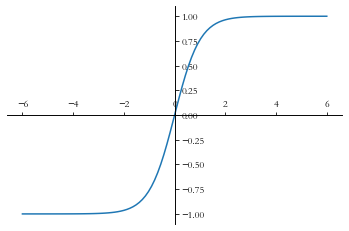

In [5]:
y3=tf.nn.tanh(x)
plt.plot(x,y3)
ax=plt.gca()
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ax.xaxis.set_ticks_position('top')
ax.spines['top'].set_position(('data',0))

ax.yaxis.set_ticks_position('right')
ax.spines['right'].set_position(('data',0))
plt.show()

In [ ]:
import os
pid=os.getpid()
!kill -9 $pid